# Table of Contents  

## Initial Processing

[Import Packages](#Import-Packages)  
[Load File](#Load-File)  
[Column Names](#Column-Names)  
[Initial Prep](#Initial-Prep)  
[Correct Age](#Correct-Age)  
[Parse Checkboxes](#Parse-Checkboxes)  
[Process Dummy Variables](#Process-Dummy-Variables)  
[Likert to Integer](#Likert-to-Integer)  


## Data Filtering  
[Filter Data](#Filter-Data)  
[Jokes](#Jokes)  
[Duplicates](#Duplicates)

## Write in Backcoding (TBD)

[Export Data](#Export-Data)


# Initial Processing

### Import Packages
[Table of Contents](#Table-of-Contents)

In [2]:
import pandas as pd
import copy
import numpy as np

from seaborn import plt
%matplotlib inline

import pickle

### Load File
[Table of Contents](#Table-of-Contents)

In [3]:
rawData = pd.read_csv('/Users/bauer/Ace/acegh/avenCensus/2016Analysis/Data_Prep/Ace_Community_Census_2016_Responses.csv')

#### Column Names

In [4]:
questions = copy.deepcopy(rawData.columns)
questionAbb = ["timestamp",
    # --------------------------- Demographics -------------------------------------------------------
    "year","month","education","student","religion","religionOther","raceDesc","raceCB", "nationality",
    # --------------------------- Race by region -------------------------------------------------------
    "USRegion","USHispanic","USRace",
    "UKRegion","UKNationality","UKWhite","UKMixed","UKAsian","UKBlack","UKOther",
    "CanadaRace","CanadaRegion",
    "countryOther",
    # --------------------------- Gender -------------------------------------------------------
    "gender","nonbinaryCB","trans","asab",
    # --------------------------- Sexual orientation labels -------------------------------------------------------
    "aceID","priorAceCB", "queer", "nonAceID", "stGayBi", "sexualityID",
    # --------------------------- Ace identity questions ---------------------------
    "firstHear","firstID","firstOutAce", "firstOutNonAce",
    "outPartners","outSiblings","outParents","outOtherFam", "outHet","outNonHet",
    "outAcquaintances","outClassmates","outCoworkers", "outCounselor", "outMedical",     
    # --------------------------- Romantic orientation ---------------------------
    "romanticIDCB","romanticGenderCB", "otherAttractCB", 
    # --------------------------- Relationships ---------------------------
    "partnered","sigRelationship","romPartner","nonRomPartner","acePartner","nonAcePartner","poly",
    # --------------------------- Sexual violence ---------------------------
    "skipViolence",
    "nonConsensual","socialPressure","assault",
    "firstViolence","lastViolence","perpsCB",
    # --------------------------- Consensual sex ---------------------------
    "conSex","firstConSex","lastConSex", "sexReasonsCB", "sexDrive",
    # --------------------------- Health ---------------------------
    "disabled", "chronicallyIll", "physDisabled", "cogDisabled", "mentallyIll", "Neurod", "adhd",
    "anxiety", "autism", "depressed", "ed", "hsdd", "personalityD", "schizoid", "vaginismus", 
    "suicideConsider", "suicideAttempt", 
    # --------------------------- Substances ---------------------------
    "alcohol", "tobacco", "weed", "drugsRecRX", "drugsOther", "drugsInject",
    # --------------------------- Negative Experiences ---------------------------
               #   Sexual Orientaion
     "harassVerbalSO", "harassOnlineSO", "harassPhysicalSO", 
    "getHousingDiffSO", "getJobDiffSO", "getMHealthDiffSO", "getOHealthDiffSO", 
    "excludedSO", "lossFinancialSO", "fixYouSO", "famRejectionSO", 
               #   Trans Gender Non-Conforming
     "harassVerbalGen", "harassOnlineGen", "harassPhysicalGen", 
    "getHousingDiffGen", "getJobDiffGen", "getMHealthDiffGen", "getOHealthDiffGen", 
    "excludedGen", "lossFinancialGen", "fixYouGen", "famRejectionGen", 
    "negExperLong",
    # --------------------------- Discrimination Impact ---------------------------
    "negExProf", "negExSocial", "negExHousing", "negExFam", "negExMHealth", "negExPHealth",
    # --------------------------- Communities ---------------------------
    "firstParticipate", "firstParticAge", 
    "readAven","readAlt","readTumblr","readLj","readBlogs","readFb",
    "readTwitter","readReddit","readYoutube","readMeetup", "readChat",
    "postAven","postAlt","postTumblr","postLj","postBlogs","postFb",
    "postTwitter","postReddit","postYoutube","postMeetup", "postChat",
    "metOffline", "offlineGroup","otherCommunity",
    "participateReasonCB", "notParticipateReasonCB", 
    # --------------------------- LGBTQ+ ---------------------------
    "lastLGBTQPartic","lgbtqExp", "lgbtqInclusion", #"lgbtq","lgbtqReason","lgbtqCommunity",
    # --------------------------- sexual politics and attitudes ---------------------------
    "sexDisposition","sexDiminish","sexPolitics","sexAttitude",
    # --------------------------- Meta ---------------------------
    "findSurvey","feedback",
    "outResponceLong", "discrimLong", "aceSupportLong", "allySupportLong", "questions", "stories",
    ]

rawData.columns = questionAbb
rawData.head(2)

,timestamp,year,month,education,student,religion,religionOther,raceDesc,raceCB,nationality,...,sexPolitics,sexAttitude,findSurvey,feedback,outResponceLong,discrimLong,aceSupportLong,allySupportLong,questions,stories
0,10/23/2016 18:57:01,1995.0,July,Some college (no degree yet),"Yes, in an undergraduate program",Agnostic,NaN,White,White or of European Descent,United States of America,...,Sex-neutral,I believe that sex is neither negative nor pos...,AVEN (English),NaN,I only tell people who seem familiar with or a...,No,NaN,NaN,NaN,NaN
1,10/23/2016 19:35:35,1998.0,September,Less than high school,"Yes, in high school",Roman Catholic,NaN,White American,White or of European Descent,United Kingdom,...,Sex-neutral,I believe that sex is neither negative nor pos...,Tumblr,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
questions

Index(['Timestamp', 'In which year were you born?',
       'In which month were you born?',
       'What is your highest completed level of education?',
       'Are you currently a student?', 'What is your religious preference?',
       'If you would like to be more specific about your religious preference, please specify below. ',
       'In your own words, how would you describe your race and or ethnicity?',
       'Do you identify with any of the following racial/ethnic categories?',
       'Please select the country in which you live. ',
       ...
       'Do you consider yourself sex-positive, sex-neutral or sex-negative, when it comes to sex in general (i.e. other people having sex)?',
       'Which of the following statements do you MOST agree with?',
       'Where did you find this survey?', 'Feedback (optional)',
       'Do you tell other people about your asexuality? How have they responded, and how did you feel about those responses?',
       'Have you ever experienced preju

### Initial Prep
[Table of Contents](#Table-of-Contents)

In [6]:
# convert timestamps to appropriate object type
rawData['timestamp'] = pd.to_datetime(rawData['timestamp'], format="%m/%d/%Y %H:%M:%S")
# sort respondents chronologically
rawData = rawData.sort_values(["timestamp"],ascending=True)

In [7]:
len(rawData[(rawData.ix[:,'firstID'] + rawData.ix[:,"year"] > 2016)])

42

### Correct Age
[Table of Contents](#Table-of-Contents)

In [8]:
def correctAge(question,minValue):
    #First convert ages to years or vice versa
    badAge = rawData[(rawData.ix[:,question] + rawData.ix[:,"year"] > 2016) & (pd.notnull(rawData.ix[:,question]))] 
    rawData.ix[badAge.index,question] = rawData.ix[badAge.index,question] - rawData.ix[badAge.index,"year"]
    
    #If ages are still greater than the current age, then toss it
    badAge = rawData[((rawData.ix[:,question] > 100) | (rawData.ix[:,question] + rawData.ix[:,"year"] > 2015)) & (pd.notnull(rawData.ix[:,question])) ]
    rawData.ix[badAge.index,question] = np.nan
    
    #Data below minValue should be tossed (minValue should be at least 1)
    badAge = rawData[( rawData.ix[:,question] < minValue) & (pd.notnull(rawData.ix[:,question]) )]
    rawData.ix[badAge.index,question] = np.nan
    return rawData

In [9]:
#correct ages
agesCorrect = [("firstID",5), ("firstOutAce",5),("firstOutNonAce",5), ("firstViolence",1), ("lastViolence",1), 
               ("firstConSex",5), ("lastConSex",5),("firstParticAge",5) ]
for i in agesCorrect:
    correctAge(*i)

### Parse Checkboxes
[Table of Contents](#Table-of-Contents)

**ParseCheckBox** is a function that does many of the same things as Siggy's parse check box function in R - with a few things to be added later. 

##### Dummy Variable Explanation
Its main function is to create individual columns for each checkbox answer. Since checkbox questions allow people to pick more than one answer, each respondent may have a varying number of answers and we need to parse them out. The way to do that is with dummy variables - which takes each response option and creates its own column with a list of 0 and 1's where 1 means someone checked the box and 0 means someone did not. If someone did not check any boxes then it  will result in an NaN, or "not a number." This parsing will additionally create columns for those who did answer at all, they are named with the suffix NaN.  

##### Dummy Variable Naming Convention
Column names for each set of dummy variables have the same prefix so that it is easier to tell that they are all from the same question. For example each race column starts with "race," while each US race question starts with "USRace."

##### Parsing function notes:  
The function first takes out the explanitory text between the parentheses, such as in:  
        >Aboriginal (North American Indian, Metis, or Inuit (Eskimo), etc.)
Here we do not need the explanation to be included in a column name, but more importantly each comma will split into a dummy variable - so the commas within the two parentheses will create additional dummy variables we do not need most notably a column named "etc.)"  
Next the function removes spaces, then makes all text lower case. 

##### Survey processing vs. Bauer's project notes
The next section gets each dummy variable's column sum, removes any column that has less than 5 responses - this eliminates *most* write in answers, but not all, and also Canadian race for West Asian, all other non-write in responses seem to have more than 5 responses. I have found this to be very helpful, but possibly not what we want for the survey. 

##### Funtion Returns
A dataframe of dummy variables is returned for one check box column.

In [10]:
def parseCheckBox(question):
    temp = rawData[question]
    #remove () explanitory text
    temp = temp.str.replace(r'\([^)]*\)', '')
    #remove spaces
    temp=temp.str.replace(r'[ ]', '')
    #make all text lowercase and strip spaces as a double check
    temp = pd.Series([str.lower(str(i)).strip() for i in temp])

    #create dummy variables for all answers within a column
    temp = temp.str.get_dummies(sep=',') 
    
    #get column sums
    temp_sums = pd.DataFrame.sum(temp)
    #get the column indexes for columns with more than 5 respones
    fiveup = [temp_sums.index[i] for i in range(len(temp_sums.index)) if temp_sums[i]>5.0]
    #only keep column sums with more than 5 respones
    fiveup = temp[fiveup]
    #replaces NaN's with 0's. This can be changed or left as NaN. Soemtimes NaN's create trouble
    #in other functions, and either way there is a column for NaNs, such as RaceNaN to refer to.
    for i in fiveup:
        fiveup[i].fillna(0, inplace=True)
    if question == 'raceCB':
        fiveup.columns = ['raceAbAust','raceAsianEast','raceAsianSouthE','raceAsianSouth','raceAsianWest',
                    'raceBlackAf','raceBlackCarib','raceBlackDias', 'raceBrown','raceHispanic','raceJewish',
                    'raceLatinx','raceMidEast', 'raceMixed','raceNaN','raceNo','raceNorthAfr','raceNorthAmerNative',
                    'racePacificIslPol','raceSouthCentAmerNative','raceWhiteOrEuropean']
    if question == 'USRace':
        fiveup.columns = ['USRaceNatAmAlask', 'USRaceAsianInd', 'USRaceBlack',
                    'USRaceChine', 'USRaceFilip', 'USRaceHisp', 'USRaceJap', 'USRaceJewish', 
                    'USRaceKorean','USRaceLatinx', 'USRaceMex', 'USRaceMidEast', 'USRaceMixed', 'USRaceNaN', 
                    'USRaceNatHawaii','USRaceOthAsian', 'USRaceOthPacIsl', 'USRaceViet', 'USRaceWhite']
    if question == 'CanadaRace':
        fiveup = fiveup.drop(['etc.)'],1)
        fiveup.columns = ['CanRaceAbor', 'CanRaceArab', 'CanRaceBlack', 'CanRaceChinese', 'CanRacefilipino',
                    'CanRaceLatAmer', 'CanRaceNaN', 'CanRaceSAsian', 'CanRaceSEAsian', 'CanRaceWhite']
    if question == 'nonbinaryCB':
        fiveup.columns = ['nbAgender', 'nbAgenderflux', 'nbAndrogynous', 'nbBigender', 'nbDemigirl',
                   'nbDemiguy', 'nbGenderfluid', 'nbGenderflux', 'nbGenderqueer', 'nbGendervague',
                   'nbGendervoid', 'nbmanMale', 'nbMaverique', 'nbNaN', 'nbNeutrois', 'nbNogender',
                   'nbNonbinary', 'nbUnsure', 'nbtrans', 'nbtransMasc','nbwomanFemale']
    if question == 'priorAceCB':
        fiveup.columns = ['priorAsex', 'priorDemi', 'priorGray', 'priorNaN', 'priorNo','priorQuestioning']
    if question == "romanticIDCB":
        fiveup.columns = ['romAndro', 'romAroflux', 'romAro', 'romBi', 'romCupio',
                   'romDemi', 'romGray', 'romGyno','romHetero', 'romHomo', 'romUnfamiliar',
                   'romNotIdentify', 'romLesbian', 'romLith', 'romNaN','romPanPoly', 'romQueer', 
                    'romUnsure','romSapio', 'romWTFQuoi']
    if question == "romanticGenderCB":
        fiveup.columns = ['romAttrMen', 'romAttrNaN', 'romAttrNone', 'romAttrNB', 'romAttrUnsure',
                   'romAttrWomen']
    if question == "otherAttractCB":
        fiveup['attAlterous'] = fiveup['alterous'] + fiveup['alterousattraction']
        fiveup['attIntellect'] = fiveup['intellectual'] +fiveup['intellectualattraction'] + fiveup['intellectual/musical/artisticability']
        fiveup = fiveup.drop(['alterous','alterousattraction', 'intellectual', 'intellectualattraction','intellectual/musical/artisticability'],1)
        fiveup.columns = ['attAesthetic','attUnfamiliar', 'attNotExperience','attNaN', 'attPlatonic',
                   'attSensual', 'attUnsure','attAlterous', 'attIntellect' ]
    if question == 'perpsCB':
        fiveup.columns = ['perpMan', 'perpIntimatePartner', 'perpNBPerson', 'perpWoman', 'perpNaN',
                   'perpNotIntimatePartner']
    if question == 'sexReasonsCB':
        fiveup.columns = ['sexRIntimacy', 'sexRSupposedTo', 'sexRNextStep', 'sexRPleasure', 'sexRPlsPartner',
                    'sexRAffection', 'sexRAesthetic', 'sexRCurious', 'sexRRomantic', 'sexRSensual', 'sexRSexualA',
                    'sexRNaN']
    if question == 'participateReasonCB':
        fiveup.columns = ['particDoNot', 'particNaN', 'particAdvocate','particFindFriendsPartners', 
                    'particFindPeopleLikMe','particDiscuss', 'particLearnAbtMeAce',
                    'particTalkAce']
    if question == 'notParticipateReasonCB':
        fiveup.columns = ['notPartNotIdentStrongly', 'notPartLackInclusion', 'notPartNotAce',
                   'notPartInconvLocSched', 'notPartCost','notPartNA', 'notPartNaN', 'notPartNervous',
                   'notPartNoLocal', 'notPartNotInt', 'notPartRacism','notPartSocAnxiety', 'notPartNotAccDisab',
                   'notPartUnfriendToLGBTQ','notPartUnfriendToGreyDemi','notPartElitistNonAces']

#     return pd.DataFrame.sum(fiveup)
#     return fiveup.columns
    return fiveup

#### Process Dummy Variables  
[Table of Contents](#Table-of-Contents)

In [11]:
#Create all Dummy Variables and combine into table
dummy_columns = ["raceCB","USRace","CanadaRace", "nonbinaryCB","priorAceCB", "romanticIDCB", "romanticGenderCB", "otherAttractCB", "perpsCB",
                "sexReasonsCB","participateReasonCB", "notParticipateReasonCB"]
dummies = parseCheckBox(dummy_columns[0]).join(parseCheckBox(dummy_columns[1]))
for i in dummy_columns[2:]:
    dummies = dummies.join(parseCheckBox(i))

/Users/bauer/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/bauer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/bauer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [12]:
data = rawData.join(dummies)
# Removes original columns
data = data.drop(dummy_columns,1)
data.head(2)

,timestamp,year,month,education,student,religion,religionOther,raceDesc,nationality,USRegion,...,notPartNaN,notPartNervous,notPartNoLocal,notPartNotInt,notPartRacism,notPartSocAnxiety,notPartNotAccDisab,notPartUnfriendToLGBTQ,notPartUnfriendToGreyDemi,notPartElitistNonAces
0,2016-10-23 18:57:01,1995.0,July,Some college (no degree yet),"Yes, in an undergraduate program",Agnostic,NaN,White,United States of America,Florida,...,0,0,1,1,0,0,0,0,1,0
1,2016-10-23 19:35:35,1998.0,September,Less than high school,"Yes, in high school",Roman Catholic,NaN,White American,United Kingdom,NaN,...,0,1,0,0,0,0,0,0,0,0


### Likert to Integer
[Table of Contents](#Table-of-Contents)

In [13]:
out = ['outPartners','outSiblings','outParents', 'outOtherFam', 'outHet', 'outNonHet', 'outAcquaintances',
         'outClassmates', 'outCoworkers', 'outCounselor', 'outMedical']
# data['outPartners'].value_counts()
outVals =  {0:'N/A', 1:'None', 2:'A few', 3:'About half', 4: 'Most', 5:'All'}

for i in out:
    data[i].replace(['N/A','None', 'A few', 'About half', 'Most', 'All'],[0,1,2,3,4,5], inplace = True)

In [14]:
outmap = [outVals]*len(out)

In [15]:
myans = [0,1,2,3,1,2,3]
for i in range(len(myans)):
    print (out[i],outmap[i][myans[i]])

outPartners N/A
outSiblings None
outParents A few
outOtherFam About half
outHet None
outNonHet A few
outAcquaintances About half


([<matplotlib.axis.XTick at 0x112b688d0>,
 <a list of 6 Text xticklabel objects>)

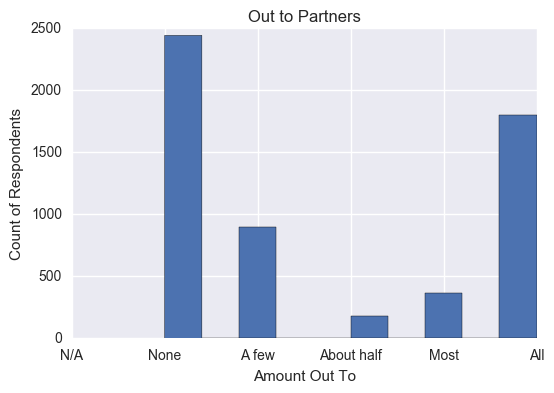

In [16]:
data.ix[:,'outPartners'].hist()
plt.title('Out to Partners')
plt.xlabel("Amount Out To")
plt.ylabel("Count of Respondents")
labels = outVals
# labels = ['No Mil. Action','Threat of Force','Display of Force','Use of Force','War']
ticks= [0,1,2,3,4,5]
plt.xticks(ticks, labels.values())

In [17]:
ynu = ['disabled', 'chronicallyIll', 'physDisabled', 'cogDisabled', 'mentallyIll', 'Neurod','suicideConsider',
         'suicideAttempt', 'harassVerbalSO', 'harassOnlineSO', 'harassPhysicalSO', 'getHousingDiffSO',
         'getJobDiffSO', 'getMHealthDiffSO', 'getOHealthDiffSO', 'excludedSO', 'lossFinancialSO', 'fixYouSO',
         'famRejectionSO', 'harassVerbalGen', 'harassOnlineGen', 'harassPhysicalGen', 'getHousingDiffGen',
         'getJobDiffGen', 'getMHealthDiffGen', 'getOHealthDiffGen', 'excludedGen', 'lossFinancialGen','fixYouGen',
         'famRejectionGen',]
# data['suicideConsider'].value_counts()
ynuVals = {0:'No', 1:'Unsure', 2:'Yes'}

for i in ynu:
    data[i].replace(['No','Unsure','Yes'],[0,1,2], inplace = True)

In [18]:
health = ['adhd', 'anxiety', 'autism', 'depressed', 'ed', 'hsdd', 'personalityD', 'schizoid', 'vaginismus',]
# data['adhd'].value_counts()
healthVals = {0:'No', 1:'Unsure', 2:'Yes - Self-Diagnosed', 3:'Yes - Professionally Diagnosed'}

for i in health:
    data[i].replace(['No','Unsure','Yes - Self-Diagnosed', 'Yes - Professionally Diagnosed'],[0,1,2,3], inplace = True)

In [19]:
substances = ['alcohol', 'tobacco', 'weed', 'drugsRecRX', 'drugsOther', 'drugsInject',]
# data['alcohol'].value_counts()
substancesVals = {0:'Not at all in the last 12 months', 1:'Once/twice in the last 12 months', 2:'Once/twice a month', 
           3:'Once/twice a week', 4:'3/4 days a week', 5:'5+ days a week'}

for i in substances:
    data[i].replace(['Not at all in the last 12 months','Once/twice in the last 12 months','Once/twice a month', 
           'Once/twice a week', '3/4 days a week', '5+ days a week'],[0,1,2,3,4,5], inplace = True)

In [20]:
negex = ['negExProf', 'negExSocial', 'negExHousing', 'negExFam', 'negExMHealth', 'negExPHealth',]
# data['negExSocial'].value_counts()
negexVals = {0:'0 (little to no impact)', 1:1, 2:2, 3:3, 4:'4 (major impact)'}

for i in negex:
    data[i].replace(['0 (little to no impact)', '1', '2', '3', '4 (major impact)'],[0,1,2,3,4], inplace = True)

In [21]:
readpost = ['readAven', 'readAlt', 'readTumblr', 'readLj', 'readBlogs', 'readFb', 'readTwitter', 'readReddit',
         'readYoutube', 'readMeetup', 'readChat', 'postAven', 'postAlt', 'postTumblr', 'postLj', 'postBlogs',
         'postFb', 'postTwitter', 'postReddit', 'postYoutube', 'postMeetup', 'postChat',]

readpostVals = {0:'A few times a year or less', 1:'A few times a month', 2:'A few times a week', 3:'At least once per day'}

for i in readpost:
    data[i].replace(['A few times a year or less', 'A few times a month', 'A few times a week', 'At least once per day'],
                    [0,1,2,3], inplace = True)

In [22]:
lgbtVals = {0:'Never', 1:'In the past month', 2:'Between a month and a year ago', 3:'Between 1 and 5 years ago', 
            4:'Over 5 years ago'}
data['lastLGBTQPartic'].replace(['Never', 'In the past month', 'Between a month and a year ago', 'Between 1 and 5 years ago', 
            'Over 5 years ago'],[0,1,2,3,4], inplace = True)

In [23]:
lgbtExpVals = {0:'0  Negative', 1:1, 2:2, 3:3, 4:'4  Positive'}

data['lgbtqExp'].replace(['0 Negative', '1', '2', '3', '4 Positive'],[0,1,2,3,4], inplace = True)

In [24]:
likert_cols = out+ ynu+ health+ substances+ negex+ readpost+['lastLGBTQPartic']+['lgbtExpVals']
likert_dics = [outVals]*len(out)+ [ynuVals]*len(ynu)+[healthVals]*len(health)+ [substancesVals]*len(substances)\
                +[negexVals]*len(negex)+ [readpostVals]*len(readpost)+ [lgbtVals]+ [lgbtExpVals]

likert_lookup = pd.DataFrame({'column': likert_cols,'dictionary': likert_dics})


In [25]:
likertDict={}
for i in range(len(likert_cols)):
    likertDict[likert_cols[i]]=likert_dics[i]
# likertDict

In [26]:
likertDict["lastLGBTQPartic"][2]

'Between a month and a year ago'

([<matplotlib.axis.XTick at 0x1114e0208>,
 <a list of 3 Text xticklabel objects>)

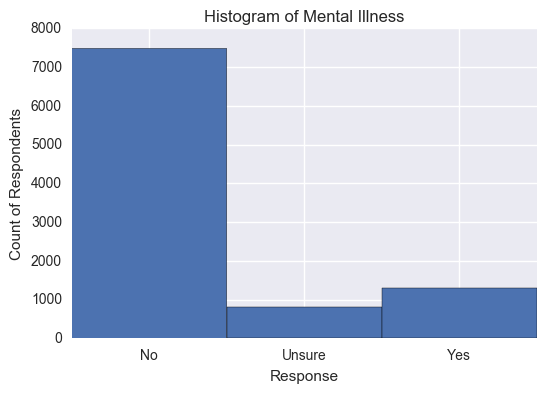

In [27]:
data.ix[:,'chronicallyIll'].hist(rwidth=1, bins=range(4))
plt.title('Histogram of Mental Illness')
plt.xlabel("Response")
plt.ylabel("Count of Respondents")
labels = likertDict["chronicallyIll"]
ticks= [0.5,1.5,2.5]
plt.xticks(ticks, labels.values())

### Functions
[Table of Contents](#Table-of-Contents)

## Data Filtering

### Filter Data
[Table of Contents](#Table-of-Contents)

In [28]:
#List of collumns to test for too many NaN values. Excludes check box questions and write in, etc.
naTestCols = ["year","month","education","student","religion","nationality", "gender",
            "trans","aceID", "queer", "nonAceID", "partnered","sigRelationship", "romPartner",
            "nonRomPartner","acePartner","nonAcePartner","poly", "sexDrive", "firstParticipate",
            "metOffline", "offlineGroup",  "lastLGBTQPartic","sexDisposition","sexDiminish",
            "sexPolitics","sexAttitude", "findSurvey"]
#Remove rows with more than 10 NaN's in the selected columns above
data = data[data[naTestCols].isnull().sum(axis=1)<10]
data.shape

(9955, 308)

### Jokes
[Table of Contents](#Table-of-Contents)

### Duplicates
[Table of Contents](#Table-of-Contents)

In [29]:
# Drop rows that are duplicates for everything except the timestamp
cols = data.columns[1:]
data = data.drop_duplicates(cols)
data.shape

(9850, 308)

### Export Data
[Table of Contents](#Table-of-Contents)

In [30]:
!pwd

/Users/bauer/ds/metis/metisgh/Metis_Projects/Community_Survey/Code


In [31]:
data.to_csv('../../../local_files/Projects/CommunityCensus/AVENCensus2016_data.csv', index=False)

In [32]:
with open('../../../local_files/Projects/CommunityCensus/2016_likertDict.pkl', 'wb') as picklefile:
    pickle.dump(likertDict, picklefile)